In [1]:
import scipy.integrate as spint
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
class onebox():
    """ one box model for chemical balance in the ocean"""
    
    def __init__(self, volume_ocean=1.29e18, river_flux=3.7e13):
        """ constructor
        
        PARAMETERS:
        
        volume_ocean: float
            volume of the ocean in m3
        river_flux: float
            river water flux in m3/year
        """
        self.volume_ocean = volume_ocean
        self.river_flux = river_flux
        return None
    
    def integrate_tracer(self, name='Calcium', river_conc=364e3, removal_rate=1e-6,
                        conc_ini=0., run_duration=1e6):
        """ time integration of the one box equation
        
        PARAMETERS:
        
        name: str
            name of the chemical element
        river_conc: float
            river concentration in umol/m3
        removal_rate: float
            removal rate of the chemical element in 1/year
        conc_ini: float
            initial concentration of chemical element in umol/m3
        run_duration: float
            integration time in years
        """
        self.name = name
        self.river_conc = river_conc
        self.removal_rate = removal_rate
        self.conc_ini = np.array([conc_ini])
        self.time_ini = 0
        self.time_end = run_duration
        # integration the box equation with RK45
        solver = spint.solve_ivp(self.ocean_onebox_equations, (self.time_ini, self.time_end,),
                         self.conc_ini, method='RK45')
        
        self.time = solver['t']
        self.tracer_conc = solver['y'].squeeze()
        # plot the results
        self.plot_timeserie()
        return self.time, self.tracer_conc
        
    def plot_timeserie(self):
        """ plotting function """
        plt.figure(figsize=[10,8])
        plt.plot(self.time, self.tracer_conc)
        plt.xlabel('years',fontsize=16)
        plt.ylabel(self.name + 'concentration [umol/m3]', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.title('Time evolution for ' + self.name + ' in one box model (Fig 1.1.2, SG06)', fontsize=16)
        return None
        
    def ocean_onebox_equations(self, time, conc):
        """ governing equation """
        dconcdt = (self.river_flux * self.river_conc - 
                   self.removal_rate * conc * self.volume_ocean) / self.volume_ocean
        return dconcdt

In [4]:
boxmodel = onebox()

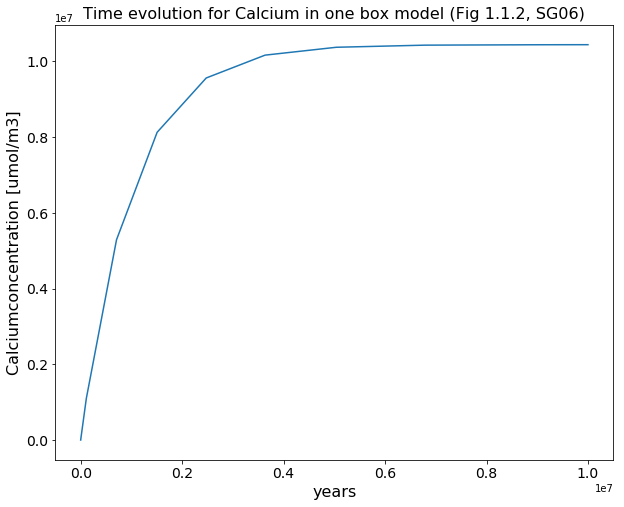

In [5]:
# default is Calcium
t, ca_conc = boxmodel.integrate_tracer(run_duration=1e7)

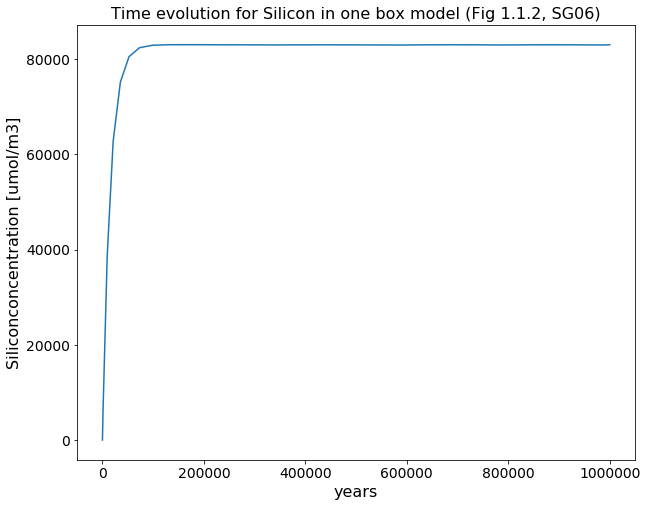

In [6]:
# Silicon
t, si_conc = boxmodel.integrate_tracer(name='Silicon', river_conc=193e3, removal_rate=1./(15e3))

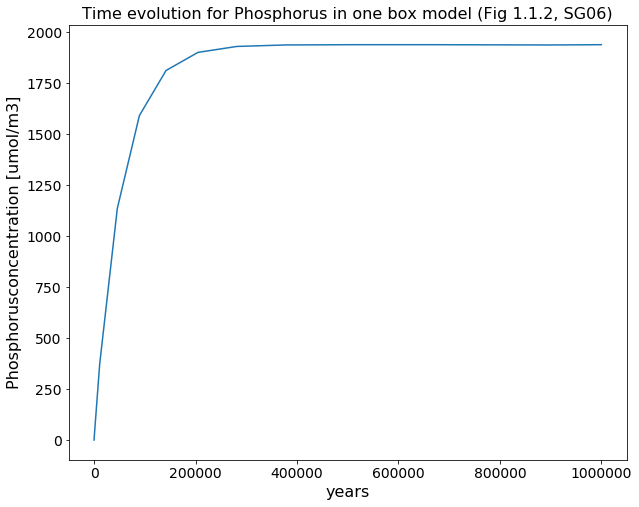

In [7]:
# Phosphorus
t, p_conc = boxmodel.integrate_tracer(name='Phosphorus', river_conc=1300, removal_rate=1./(52e3))
